# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
!pip3 install seaborn
!pip install statsmodels


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [7]:
df_pct_completed_hs.shape

(29329, 3)

In [8]:
df_pct_poverty.isna().sum()
# rows_with_nans = df_pct_completed_hs[df_pct_completed_hs.isna().any(axis=1)]
# rows_with_nans  

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [9]:
df_pct_completed_hs.duplicated().sum()

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)

In [11]:
df_fatalities['armed'] = df_fatalities['armed'].fillna('unknown')
df_fatalities['age'] = df_fatalities['age'].fillna(df_fatalities['age'].median())
df_fatalities['race'] = df_fatalities['race'].fillna('unknown')
df_fatalities['flee'] = df_fatalities['flee'].fillna('unknown')

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

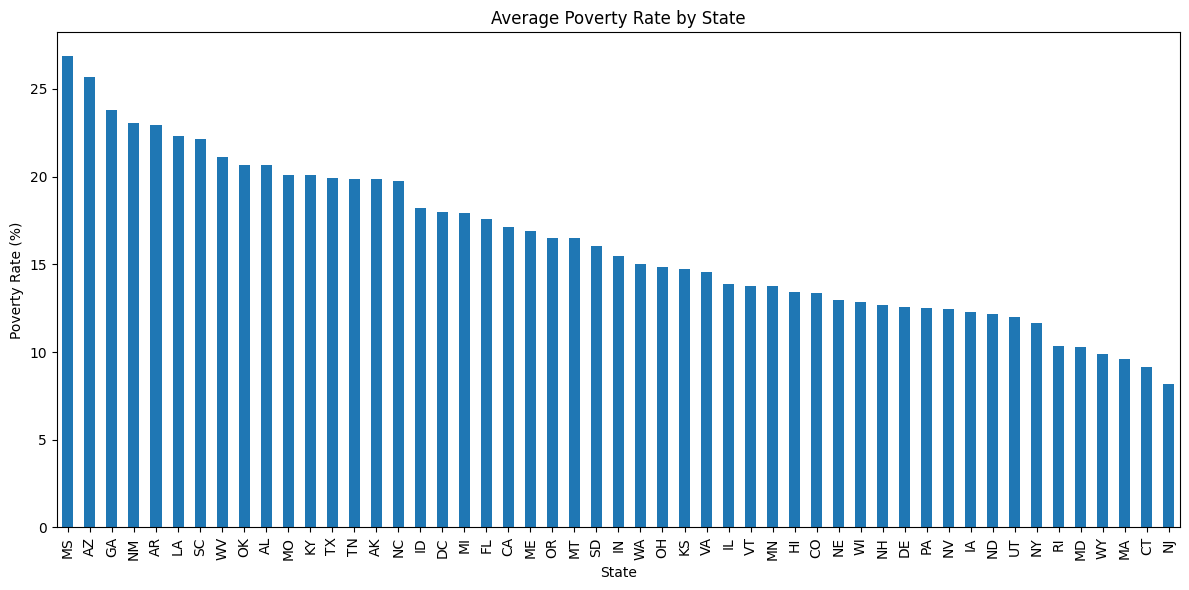

In [13]:
plt.figure(figsize=(12,6))
state_poverty.plot(kind='bar')
plt.title('Average Poverty Rate by State')
plt.xlabel('State')
plt.ylabel('Poverty Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
print(f"State with the highest average poverty rate: {state_poverty.idxmax()} ({state_poverty.max()}%)")
print(f"State with the lowest average poverty rate: {state_poverty.idxmin()} ({state_poverty.min()}%)")

State with the highest average poverty rate: MS (26.88425414364641%)
State with the lowest average poverty rate: NJ (8.19097605893186%)


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [15]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_hs_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True)

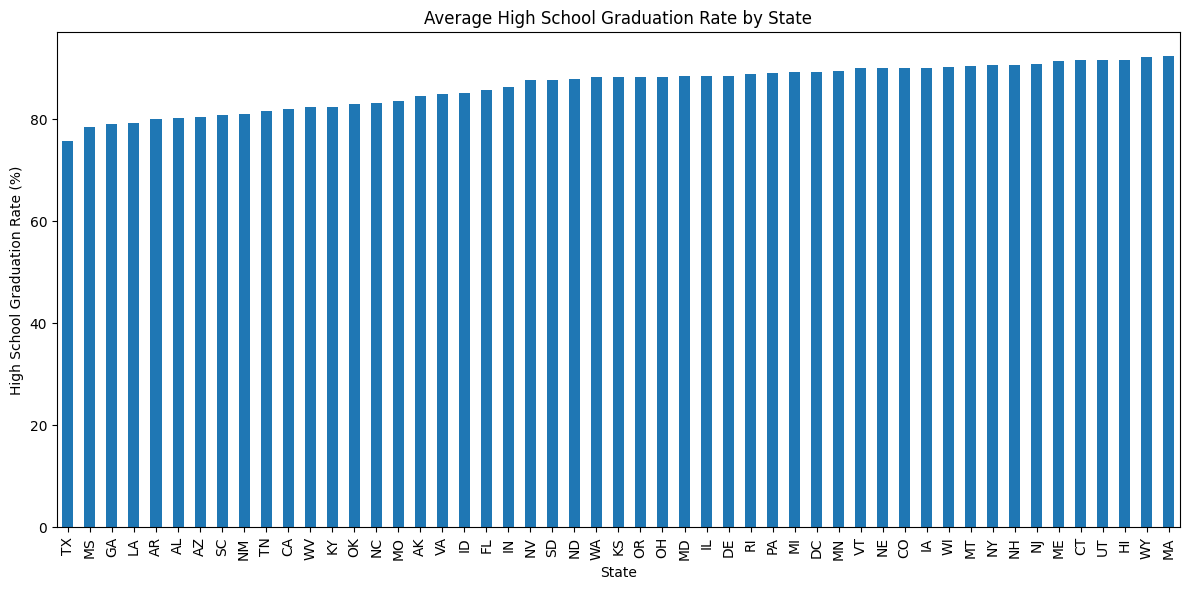

In [16]:
plt.figure(figsize=(12,6))
state_hs_graduation.plot(kind='bar')
plt.title('Average High School Graduation Rate by State')
plt.xlabel('State')
plt.ylabel('High School Graduation Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [17]:
merged_df = pd.merge(df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City'])

In [18]:
merged_df.head()

,Geographic Area,City,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,78.80,21.20
1,AL,Abbeville city,29.10,69.10
2,AL,Adamsville city,25.50,78.90
3,AL,Addison town,30.70,81.40
4,AL,Akron town,42.00,68.60


In [19]:
# Convert columns to numeric, keeping NaN values
merged_df['poverty_rate'] = pd.to_numeric(merged_df['poverty_rate'], errors='coerce')
merged_df['percent_completed_hs'] = pd.to_numeric(merged_df['percent_completed_hs'], errors='coerce')

In [20]:
poverty_median = merged_df['poverty_rate'].median()
hs_completion_median = merged_df['percent_completed_hs'].median()

merged_df['poverty_rate'] = merged_df['poverty_rate'].fillna(poverty_median)
merged_df['percent_completed_hs'] = merged_df['percent_completed_hs'].fillna(hs_completion_median)


In [21]:
merged_df.isna().sum()

Geographic Area         0
City                    0
poverty_rate            0
percent_completed_hs    0
dtype: int64

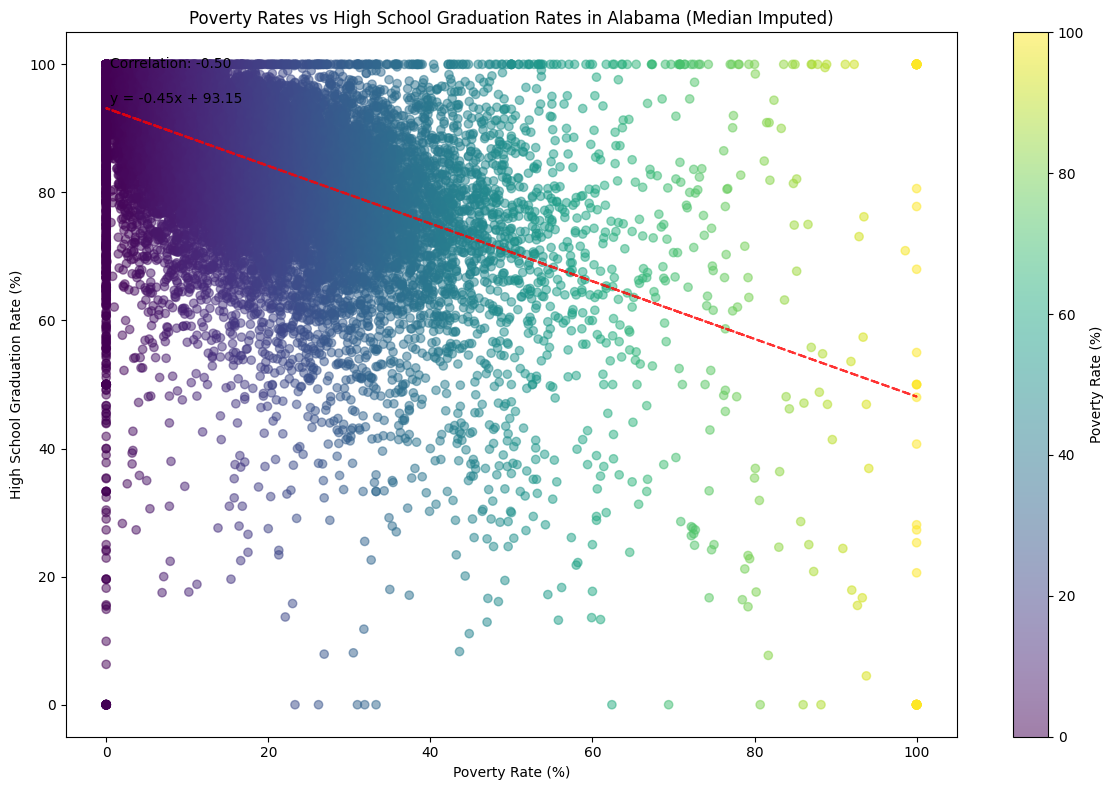

In [22]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(merged_df['poverty_rate'], merged_df['percent_completed_hs'], alpha=0.5, c=merged_df['poverty_rate'], cmap='viridis')
plt.colorbar(scatter, label='Poverty Rate (%)')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.title('Poverty Rates vs High School Graduation Rates in Alabama (Median Imputed)')

# Add a trend line
z = np.polyfit(merged_df['poverty_rate'], merged_df['percent_completed_hs'], 1)
p = np.poly1d(z)
plt.plot(merged_df['poverty_rate'], p(merged_df['poverty_rate']), "r--", alpha=0.8)

# Calculate and display correlation coefficient
correlation = merged_df['poverty_rate'].corr(merged_df['percent_completed_hs'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Calculate and display the line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['poverty_rate'], merged_df['percent_completed_hs'])
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.90, line_eq, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [23]:
print(merged_df[['poverty_rate', 'percent_completed_hs']].describe())

       poverty_rate  percent_completed_hs
count     29,328.00             29,328.00
mean          16.42                 85.75
std           13.13                 11.84
min            0.00                  0.00
25%            7.20                 81.10
50%           13.70                 88.40
75%           22.40                 93.50
max          100.00                100.00


In [24]:
# Identify cities with extreme values
print("\nCities with lowest high school graduation rates:")
print(merged_df.nsmallest(5, 'percent_completed_hs')[['City', 'poverty_rate', 'percent_completed_hs']])

print("\nCities with highest poverty rates:")
print(merged_df.nlargest(5, 'poverty_rate')[['City', 'poverty_rate', 'percent_completed_hs']])


Cities with lowest high school graduation rates:
                 City  poverty_rate  percent_completed_hs
594       Aleneva CDP          0.00                  0.00
618   Birch Creek CDP        100.00                  0.00
855       Rampart CDP          0.00                  0.00
1131       Kohatk CDP          0.00                  0.00
1311   Tat Momoli CDP        100.00                  0.00

Cities with highest poverty rates:
                 City  poverty_rate  percent_completed_hs
618   Birch Creek CDP        100.00                  0.00
683         Ferry CDP        100.00                100.00
1311   Tat Momoli CDP        100.00                  0.00
1327       Topock CDP        100.00                100.00
1342     Vaiva Vo CDP        100.00                 50.00


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

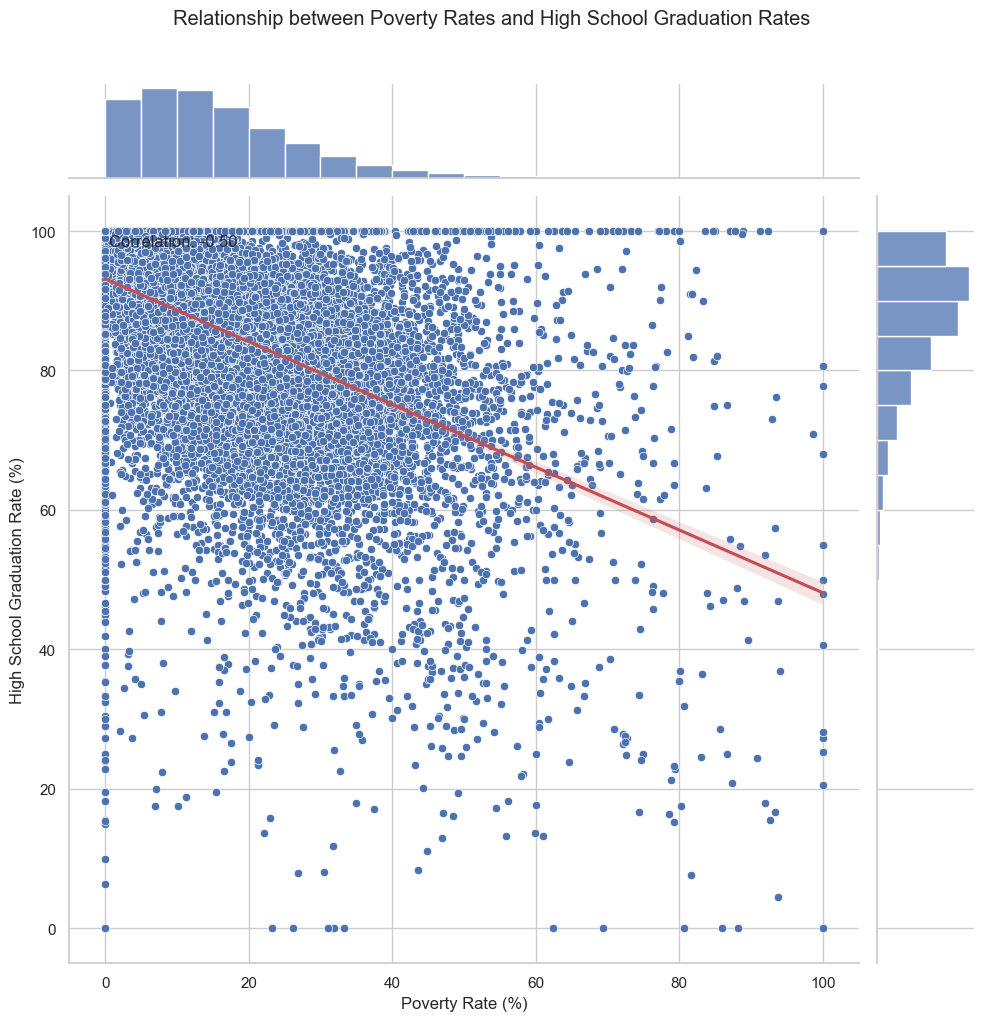

In [25]:
sns.set_theme(style="whitegrid")
g = sns.jointplot(
    data=merged_df,
    x="poverty_rate",
    y="percent_completed_hs",
    kind="scatter",
    height=10,
    ratio=7,
    marginal_kws=dict(bins=20, fill=True)
)
# Add a regression line
sns.regplot(
    x="poverty_rate",
    y="percent_completed_hs",
    data=merged_df,
    scatter=False,
    ax=g.ax_joint,
    color="r"
)
# Customize the plot
g.figure.suptitle("Relationship between Poverty Rates and High School Graduation Rates", y=1.02)
g.set_axis_labels("Poverty Rate (%)", "High School Graduation Rate (%)")

# Add correlation coefficient
corr = merged_df['poverty_rate'].corr(merged_df['percent_completed_hs'])
g.ax_joint.text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=g.ax_joint.transAxes, 
                verticalalignment='top')

# Show the plot
plt.tight_layout()
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [26]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [27]:
# Define the columns representing different races
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Convert race columns to numeric, replacing any non-numeric values with NaN
for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Calculate average percentages for each state
state_averages = df_share_race_city.groupby('Geographic area')[race_columns].mean()

# Handle any remaining NaN values by filling with 0
state_averages = state_averages.fillna(0)

# Normalize to ensure sum is 100% for each state
state_averages = state_averages.div(state_averages.sum(axis=1), axis=0) * 100


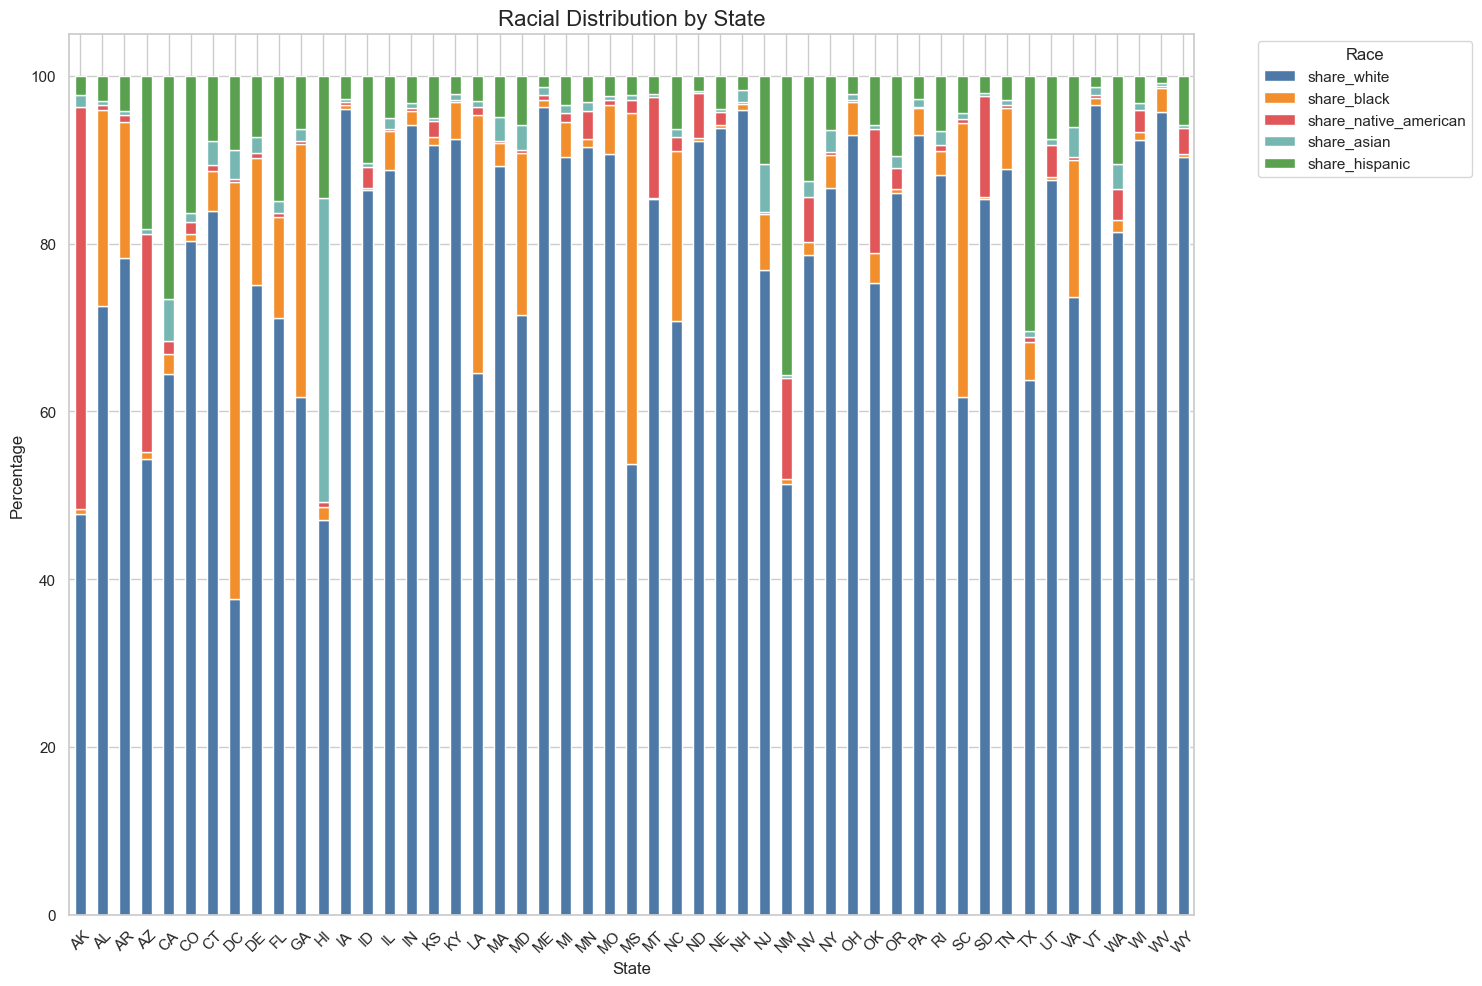

In [28]:
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(15, 10))

colors = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f']
state_averages.plot(kind='bar', stacked=True, ax=ax, color=colors)

plt.title('Racial Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [29]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [30]:
race_counts = df_fatalities['race'].value_counts()

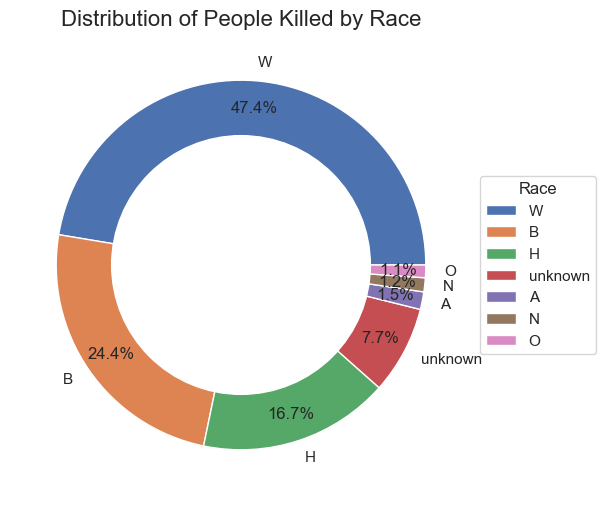

In [31]:
plt.figure(figsize=(12, 6))
plt.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%', pctdistance=0.85, 
        wedgeprops=dict(width=0.5, edgecolor='white'))

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of People Killed by Race", fontsize=16)
plt.legend(title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [32]:
male_fatalities = df_fatalities[df_fatalities['gender'] == 'M']
female_fatalities = df_fatalities[df_fatalities['gender'] == 'F']

male_count = len(male_fatalities)
female_count = len(female_fatalities)

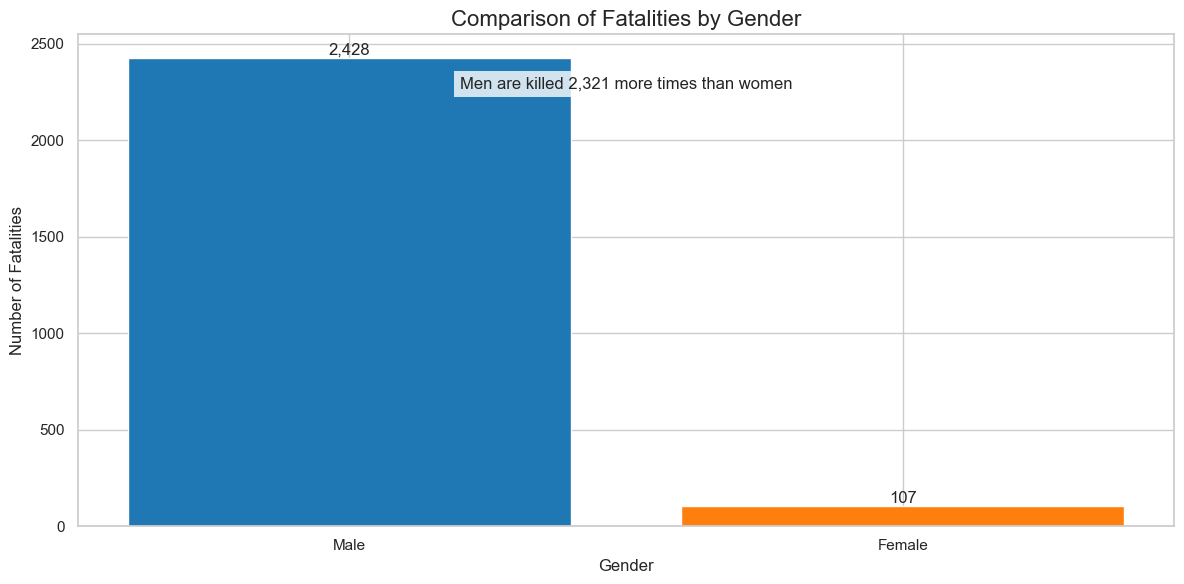

In [33]:
# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(['Male', 'Female'], [male_count, female_count], color=['#1f77b4', '#ff7f0e'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')
    
# Customize the chart
plt.title('Comparison of Fatalities by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)

# Add a text annotation to highlight the difference
difference = male_count - female_count
plt.text(0.5, 0.9, f'Men are killed {difference:,} more times than women',
         horizontalalignment='center',
         verticalalignment='center',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Show the plot
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

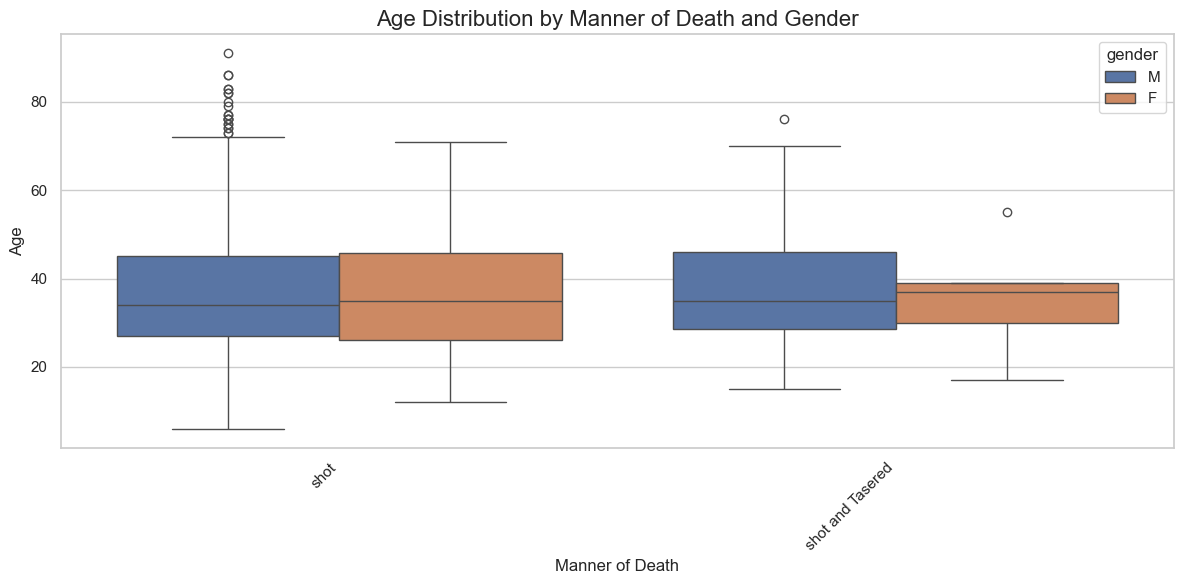

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='manner_of_death', y='age', hue ='gender', data=df_fatalities)
# Customize the plot
plt.title('Age Distribution by Manner of Death and Gender', fontsize=16)
plt.xlabel('Manner of Death', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [35]:
# Calculate and print statistics
stats = df_fatalities.groupby(['manner_of_death', 'gender'])['age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
stats = stats.round(2)  # Round to 2 decimal places for readability
print(stats)

                         count  mean  median   std   min   max
manner_of_death  gender                                       
shot             F         102 36.54   35.00 12.76 12.00 71.00
                 M        2261 36.49   34.00 12.90  6.00 91.00
shot and Tasered F           5 35.60   37.00 13.85 17.00 55.00
                 M         167 36.99   35.00 12.07 15.00 76.00


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [36]:
# Calculate total killings and unarmed killings
total_killings = len(df_fatalities)
unarmed_killings = len(df_fatalities[df_fatalities['armed'] == 'unarmed'])
armed_killings = total_killings - unarmed_killings
armed_killing_counts = df_fatalities[df_fatalities['armed'] != 'unarmed']['armed'].value_counts()

# Calculate percentage of armed killings
percent_armed = (armed_killings / total_killings) * 100

# Count of gun-related killings
gun_killings = armed_killing_counts.get('gun', 0)

# Prepare data for pie chart (top 4 weapons + Others + Unarmed)
top_weapons = armed_killing_counts.nlargest(4)
other_weapons = armed_killing_counts.sum() - top_weapons.sum()
pie_data = pd.concat([top_weapons, pd.Series({'Other weapons': other_weapons, 'Unarmed': unarmed_killings})])

In [37]:
print(f"Total killings: {total_killings}")
print(f"Total armed killings: {armed_killings}, which is {percent_armed:.2f}% of total killings")
print(f"Total unarmed killings: {unarmed_killings}, which is {100 - percent_armed:.2f}% of total killings")

Total killings: 2535
Total armed killings: 2364, which is 93.25% of total killings
Total unarmed killings: 171, which is 6.75% of total killings


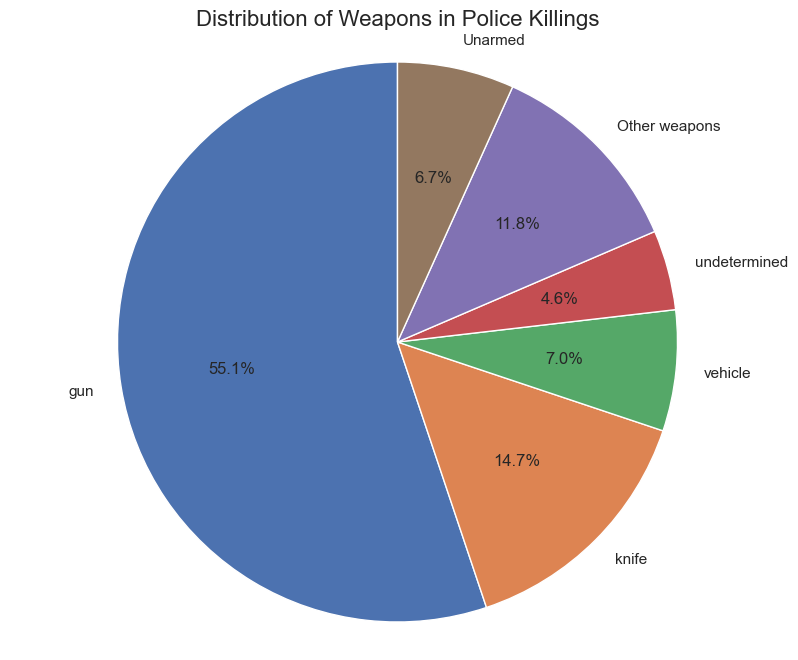

In [38]:
# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weapons in Police Killings', fontsize=16)
plt.axis('equal')
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [39]:
under_25_deaths = df_fatalities[df_fatalities['age'] < 25]
percent_under_25_deaths = (len(under_25_deaths) / total_killings) * 100
print(f"Percentage of deaths under 25 years old: {percent_under_25_deaths:.2f}%")

Percentage of deaths under 25 years old: 17.75%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

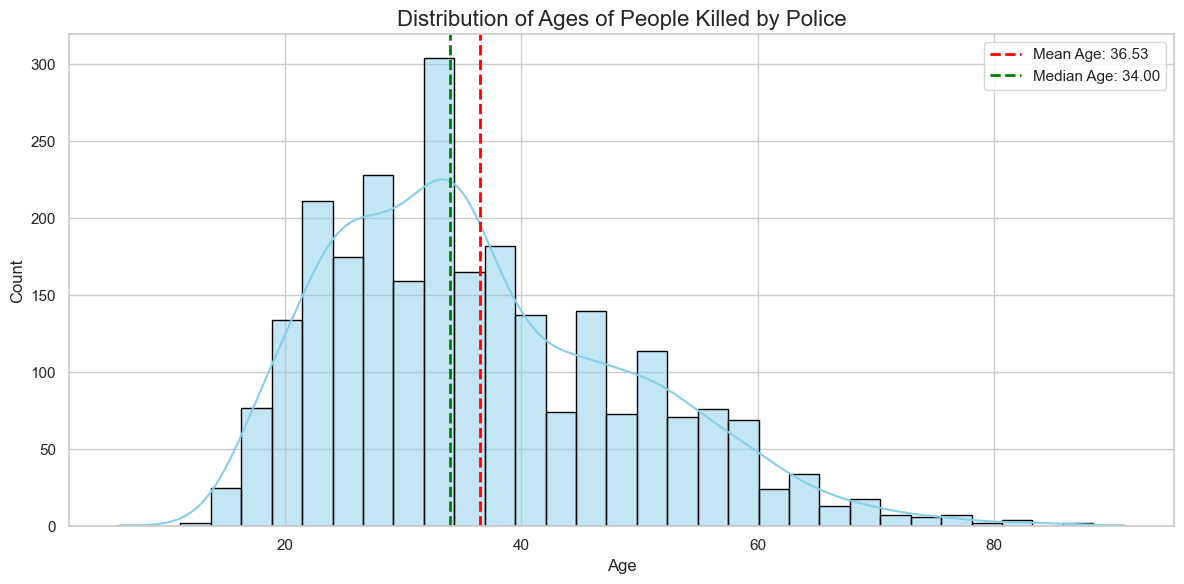

In [40]:
sns.set_theme(style="whitegrid")
# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df_fatalities, x='age', kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

mean_age = df_fatalities['age'].mean()
median_age = df_fatalities['age'].median()
mode_age = df_fatalities['age'].mode().values[0]
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age:.2f}")

Mean Age: 36.53
Median Age: 34.00
Mode Age: 34.00


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [42]:
mental_illness_counts = df_fatalities[df_fatalities['signs_of_mental_illness'] == True]['signs_of_mental_illness']
mental_illness_percent = (len(mental_illness_counts) / total_killings) * 100
not_mental_illness_percent = 100 - mental_illness_percent
print(f"Percentage of deaths with signs of mental illness: {mental_illness_percent:.2f}%")
print(f"Percentage of deaths without signs of mental illness: {not_mental_illness_percent:.2f}%")

Percentage of deaths with signs of mental illness: 24.97%
Percentage of deaths without signs of mental illness: 75.03%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

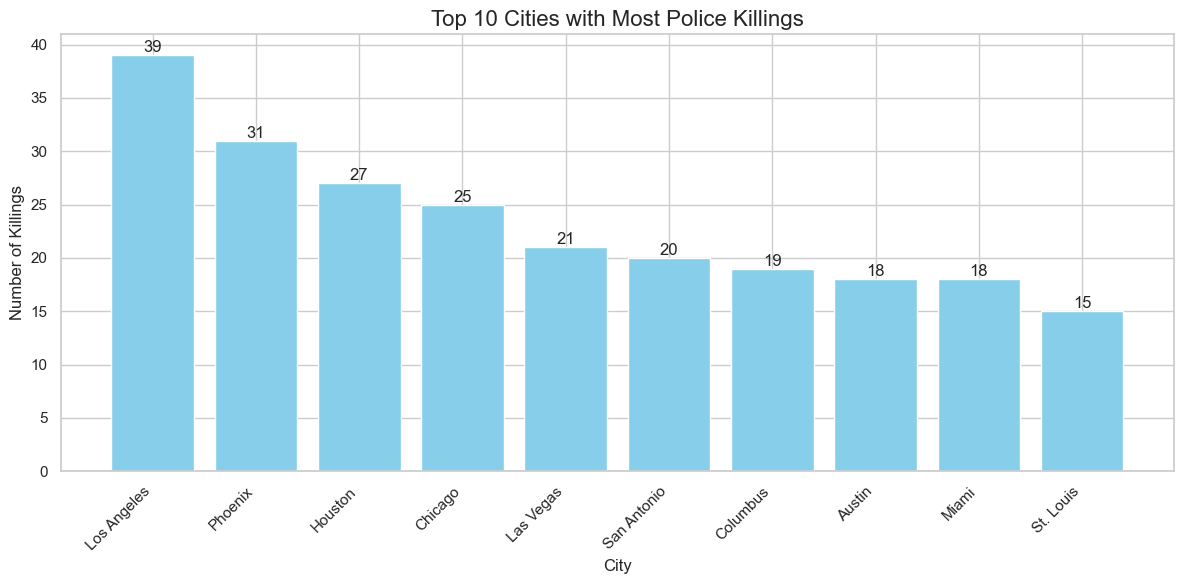

In [43]:
city_counts = df_fatalities['city'].value_counts()
top_10_cities = city_counts.nlargest(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cities.index, top_10_cities.values, color='skyblue')

plt.title('Top 10 Cities with Most Police Killings', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Killings', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(int(bar.get_height())), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [44]:
# # First, let's merge the poverty data into df_fatalities
# df_fatalities = df_fatalities.merge(df_pct_poverty[['City', 'poverty_rate']], 
#                                     left_on='city', 
#                                     right_on='City', 
#                                     how='left')

# # Drop the redundant 'City' column and any rows where we couldn't match poverty data
# df_fatalities = df_fatalities.drop('City', axis=1).dropna(subset=['poverty_rate'])

In [45]:
# # 1. Overall correlation
# correlation = df_fatalities['poverty_rate'].corr(df_fatalities['age'])
# print(f"Overall correlation between city poverty rate and age of fatality: {correlation:.2f}")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [55]:
df_fatalities.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,unknown,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,34.00,M,unknown,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,2017-07-31,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [56]:
# Ensure date is in datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Filter data up to July 31, 2017
df_filtered = df_fatalities[df_fatalities['date'] <= '2017-07-31']

# Group deaths by month
monthly_deaths = df_filtered.groupby(df_filtered['date'].dt.to_period('M')).size()


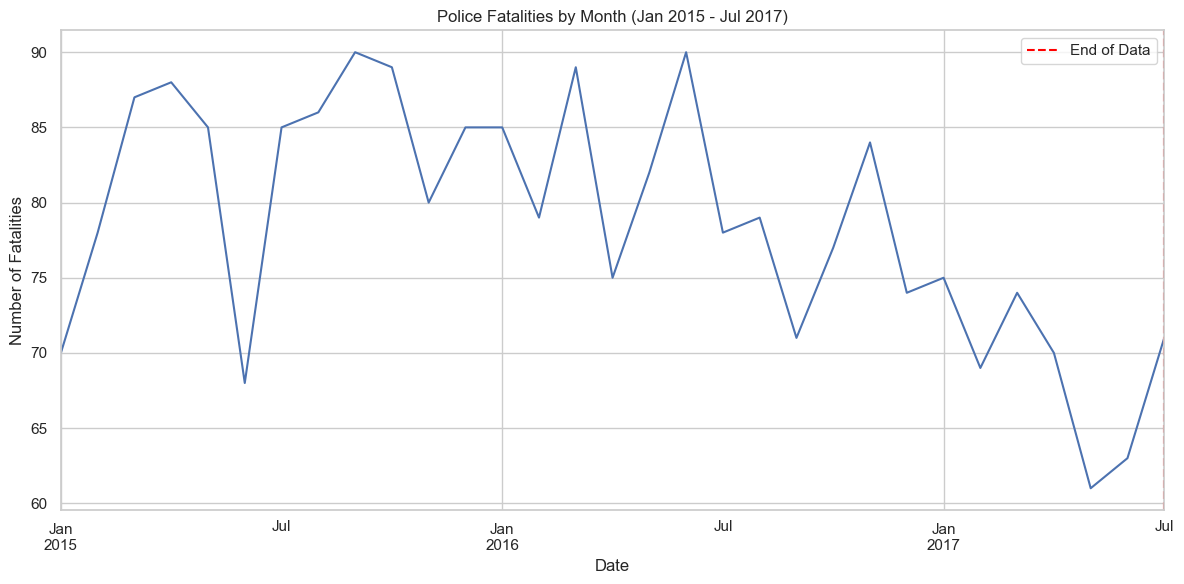

In [57]:
# Plot
plt.figure(figsize=(12, 6))
monthly_deaths.plot(kind='line')
plt.title('Police Fatalities by Month (Jan 2015 - Jul 2017)')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')

# Add vertical line for end date
plt.axvline(x=pd.Period('2017-07'), color='red', linestyle='--', label='End of Data')

plt.legend()
plt.tight_layout()
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).